In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#Agregando csv y librerías necesarias
data = pd.read_csv('personality_dataset.csv',sep = ',',decimal='.')
df = pd.DataFrame(data)

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
#Cambio Yes y No por 1 y 0 para que entren en el análisis
from sklearn.preprocessing import LabelEncoder

categorical_cols =['Stage_fear','Drained_after_socializing','Personality'] #extrovert = 1, introvert = 0
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [37]:
df_stats=df.describe().T
print("Estadísticas descriptivas:")
df_stats

Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
Stage_fear,2900.0,0.536552,0.546911,0.0,0.0,1.0,1.0,2.0
Social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
Going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
Drained_after_socializing,2900.0,0.521034,0.534339,0.0,0.0,1.0,1.0,2.0
Friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
Post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0
Personality,2900.0,0.514138,0.499886,0.0,0.0,1.0,1.0,1.0


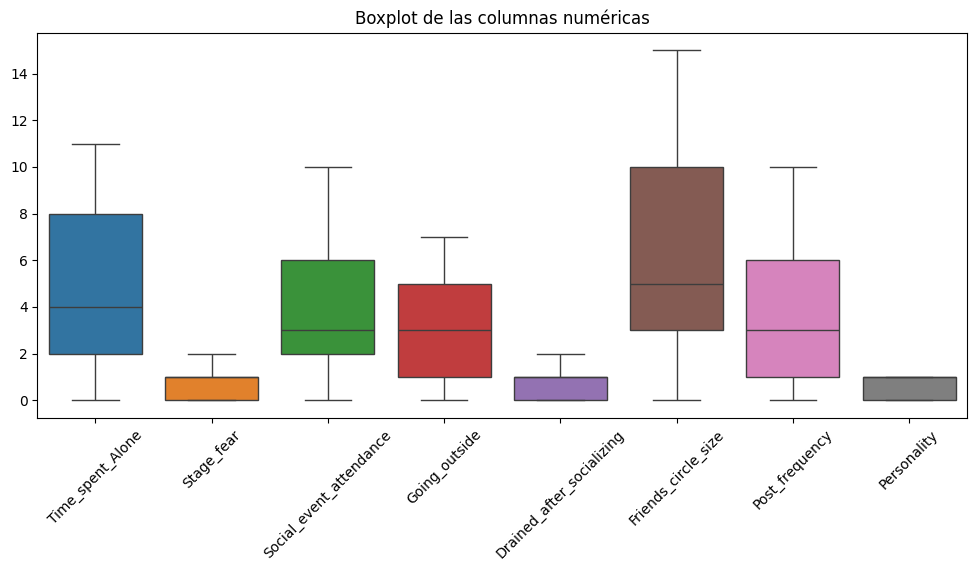

Número de Filas con Valores Atípicos: 0


In [38]:
import seaborn as sns

# Seleccionamos sólo las columnas numéricas



# Se crea el boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas columnas
plt.title("Boxplot de las columnas numéricas")
plt.show()

# Buscamos valores atípicos en cada columna numérica

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico

# Definimos los límites de valores normales
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los valores atípicos
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
cant_outliers = outliers.sum()

print("Número de Filas con Valores Atípicos:", cant_outliers)

In [39]:
#Correlación de los datos no normalizados
correlaciones = df.corr(method='pearson')
correlaciones

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.754872,-0.733011,-0.750760,0.803352,-0.717185,-0.732649,-0.720312
Stage_fear,0.754872,1.000000,-0.754771,-0.777804,0.821857,-0.732254,-0.750167,-0.763340
Social_event_attendance,-0.733011,-0.754771,1.000000,0.747756,-0.805825,0.734795,0.744615,0.729417
Going_outside,-0.750760,-0.777804,0.747756,1.000000,-0.821719,0.736390,0.770819,0.747794
Drained_after_socializing,0.803352,0.821857,-0.805825,-0.821719,1.000000,-0.777299,-0.795838,-0.813410
Friends_circle_size,-0.717185,-0.732254,0.734795,0.736390,-0.777299,1.000000,0.707888,0.696507
Post_frequency,-0.732649,-0.750167,0.744615,0.770819,-0.795838,0.707888,1.000000,0.729287
Personality,-0.720312,-0.763340,0.729417,0.747794,-0.813410,0.696507,0.729287,1.000000
